# Intro

In this optional assignment, the goal is to analyze the performance of different classification models which are trained on the MNIST dataset. First, the dataset is loaded and split into training, validation and test sets. Then, the training and validation data is pre-processed using Principal Component Analysis (PCA) to reduce its dimensionality, and then scaled.

We train a set of models with cross-validation and hyperparameter search, based on the following classification algorithms:


*   Logistic regression
*   Ridge classifier
*   KNN
*   SVM
*   Voting classifier (using better performing models)

In the case of SVM, a hyperparameter search is conducted to find the best kernel and regularization parameter. Similarly, we use the same search to find the best regularization parameter for the ridge classifier, and the best number of neighbors for the KNN classifier. The best performing models will also be integrated into a voting classifier.





In [ ]:
# import necessary modules
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Load and split data

In [ ]:
# load MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print('Dataset size: {}'.format(X.shape))
print('Labels size: {}'.format(y.shape))

X, X_reduced, y, y_reduced = train_test_split(X, y, test_size = 0.2, random_state=5)

print('Reduced dataset X size: {}'.format(X_reduced.shape))
print('Reduced dataset y size: {}'.format(y_reduced.shape))

# Reduce size
im_train_and_val, im_test, y_train_and_val, y_test = train_test_split(X_reduced, y_reduced, test_size = 0.2, random_state=5)

print('Training and validation set X size: {}'.format(im_train_and_val.shape))
print('Test set X size: {}'.format(im_test.shape))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dataset size: (70000, 784)
Labels size: (70000,)
Reduced dataset X size: (14000, 784)
Reduced dataset y size: (14000,)
Training and validation set X size: (11200, 784)
Test set X size: (2800, 784)


# Perform PCA

In [ ]:
# Initialize PCA with desired number of components (e.g., n_components=10)
pca = PCA(n_components=25)

# Fit PCA on training data and transform both training and validation data
x_train_and_val = pca.fit_transform(im_train_and_val)
x_test = pca.transform(im_test)

# Perform data scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_and_val)
x_train_and_val = scaler.transform(x_train_and_val)
x_test = scaler.transform(x_test)

# Models

## Logistic regression

In [ ]:
# Cross validation w/ linear regression
# Create a logistic regression model
logistic_model = LogisticRegression()
cv_scores_lr = cross_validate(logistic_model, x_train_and_val, y_train_and_val, cv=10, scoring = ('accuracy', 'precision_macro', 'recall_macro'))
print('Accuracy, k-fold cross validation, logistic regression: {}'.format(np.mean(cv_scores_lr['test_accuracy'])))
print('Scores for all folds: {}\n'.format(cv_scores_lr['test_accuracy']))
print('Precision, k-fold cross validation, logistic regression: {}'.format(np.mean(cv_scores_lr['test_precision_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_lr['test_precision_macro']))
print('Recall, k-fold cross validation, logistic regression: {}'.format(np.mean(cv_scores_lr['test_recall_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_lr['test_recall_macro']))

Accuracy, k-fold cross validation, logistic regression: 0.8871428571428572
Scores for all folds: [0.88571429 0.89107143 0.89464286 0.86964286 0.87321429 0.88035714
 0.88660714 0.90535714 0.89910714 0.88571429]

Precision, k-fold cross validation, logistic regression: 0.8863449204576883
Scores for all folds: [0.88415105 0.88996398 0.89425604 0.86781673 0.87095884 0.8791923
 0.88672507 0.90512114 0.8989892  0.88627485]

Recall, k-fold cross validation, logistic regression: 0.8854180874980294
Scores for all folds: [0.88408056 0.88934325 0.89383035 0.86598808 0.87030553 0.87825977
 0.88473653 0.9052736  0.8980689  0.8842943 ]



## Ridge Classifier

In [ ]:
ridge_model = RidgeClassifier()
parameters_rc = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
rc_hyp = GridSearchCV(ridge_model, parameters_rc)
rc_result = rc_hyp.fit(x_train_and_val, y_train_and_val)
cv_scores_rc = cross_validate(rc_result, x_train_and_val, y_train_and_val, cv=10, scoring = ('accuracy', 'precision_macro', 'recall_macro'))

print('Accuracy, k-fold cross validation, ridge classifier: {}'.format(np.mean(cv_scores_rc['test_accuracy'])))
print('Scores for all folds: {}'.format(cv_scores_rc['test_accuracy']))
print('Precision, k-fold cross validation, ridge classifier: {}'.format(np.mean(cv_scores_rc['test_precision_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_rc['test_precision_macro']))
print('Recall, k-fold cross validation, ridge classifier: {}'.format(np.mean(cv_scores_rc['test_recall_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_rc['test_recall_macro']))
print('Best parameters set found on development set: {}\n'.format(rc_result.best_params_))

Accuracy, k-fold cross validation, ridge classifier: 0.8150000000000001
Scores for all folds: [0.81875    0.8125     0.82857143 0.79285714 0.8        0.8125
 0.81339286 0.82142857 0.83125    0.81875   ]
Precision, k-fold cross validation, ridge classifier: 0.8226580504148489
Scores for all folds: [0.82610253 0.82064147 0.83816183 0.80371115 0.80039513 0.82185914
 0.82091406 0.82754638 0.84052285 0.82672596]

Recall, k-fold cross validation, ridge classifier: 0.8098608916227734
Scores for all folds: [0.81395882 0.80742066 0.82427132 0.78651498 0.79368172 0.80706564
 0.80820978 0.81695336 0.82708688 0.81344576]

Best parameters set found on development set: {'alpha': 0.0001}



## KNN

In [ ]:
nn_model = KNeighborsClassifier()
parameters_knn = {'n_neighbors':[1, 3, 5, 10, 15]}
knn_hyp = GridSearchCV(nn_model, parameters_knn)
knn_result = knn_hyp.fit(x_train_and_val, y_train_and_val)
cv_scores_knn = cross_validate(knn_result, x_train_and_val, y_train_and_val, cv=10, scoring = ('accuracy', 'precision_macro', 'recall_macro'))

print('Accuracy, k-fold cross validation, knn: {}'.format(np.mean(cv_scores_knn['test_accuracy'])))
print('Scores for all folds: {}'.format(cv_scores_knn['test_accuracy']))
print('Precision, k-fold cross validation, knn: {}'.format(np.mean(cv_scores_knn['test_precision_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_knn['test_precision_macro']))
print('Recall, k-fold cross validation, knn: {}'.format(np.mean(cv_scores_knn['test_recall_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_knn['test_recall_macro']))
print('Best parameters set found on development set: {}\n'.format(knn_result.best_params_))

Accuracy, k-fold cross validation, knn: 0.945625
Scores for all folds: [0.94553571 0.95267857 0.95357143 0.93928571 0.93214286 0.95
 0.94107143 0.94642857 0.94732143 0.94821429]
Precision, k-fold cross validation, knn: 0.9466980874778461
Scores for all folds: [0.94572167 0.95376511 0.9551284  0.93990092 0.93304349 0.95025373
 0.94237002 0.94706232 0.94931044 0.95042478]

Recall, k-fold cross validation, knn: 0.9445896497285577
Scores for all folds: [0.94477649 0.95138337 0.95263658 0.93840484 0.93074541 0.94876425
 0.93957838 0.9456299  0.94644858 0.94752871]

Best parameters set found on development set: {'n_neighbors': 3}



## SVM

In [ ]:
svm = SVC()
parameters_svm = {'kernel':('linear', 'poly'), 'C':[0.01, 0.1, 1, 10]}
svm_hyp = GridSearchCV(svm, parameters_svm)
svm_result = svm_hyp.fit(x_train_and_val, y_train_and_val)
cv_scores_svm = cross_validate(svm_result, x_train_and_val, y_train_and_val, cv=10, scoring = ('accuracy', 'precision_macro', 'recall_macro'))

print('Accuracy, k-fold cross validation, SVM: {}'.format(np.mean(cv_scores_svm['test_accuracy'])))
print('Scores for all folds: {}'.format(cv_scores_svm['test_accuracy']))
print('Precision, k-fold cross validation, SVM: {}'.format(np.mean(cv_scores_svm['test_precision_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_svm['test_precision_macro']))
print('Recall, k-fold cross validation, SVM: {}'.format(np.mean(cv_scores_svm['test_recall_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_svm['test_recall_macro']))
print('Best parameters set found on development set: {}\n'.format(svm_result.best_params_))

Accuracy, k-fold cross validation, SVM: 0.9572321428571428
Scores for all folds: [0.95714286 0.95714286 0.96339286 0.95535714 0.95357143 0.96071429
 0.95089286 0.95892857 0.95982143 0.95535714]
Precision, k-fold cross validation, SVM: 0.9572258107978822
Scores for all folds: [0.95660233 0.95646708 0.9639369  0.95535217 0.95334671 0.96044519
 0.95094812 0.95962378 0.96062353 0.9549123 ]

Recall, k-fold cross validation, SVM: 0.9568773270431052
Scores for all folds: [0.95692035 0.95651251 0.96362059 0.95500266 0.9531168  0.96000461
 0.95037241 0.95895296 0.95943564 0.95483474]

Best parameters set found on development set: {'C': 1, 'kernel': 'poly'}



## Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('knn',knn_hyp), ('svm',svm_hyp)], voting='hard')
cv_scores_voting_clf = cross_validate(voting_clf, x_train_and_val, y_train_and_val, cv=10, scoring = ('accuracy', 'precision_macro', 'recall_macro'))
print('Accuracy, k-fold cross validation on test data, voting classifier: {}'.format(np.mean(cv_scores_voting_clf['test_accuracy'])))
print('Scores for all folds: {}'.format(cv_scores_voting_clf['test_accuracy']))
print('Precision, k-fold cross validation, voring classifier: {}'.format(np.mean(cv_scores_voting_clf['test_precision_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_voting_clf['test_precision_macro']))
print('Recall, k-fold cross validation, voting classifier: {}'.format(np.mean(cv_scores_voting_clf['test_recall_macro'])))
print('Scores for all folds: {}\n'.format(cv_scores_voting_clf['test_recall_macro']))

Accuracy, k-fold cross validation on test data, voting classifier: 0.9494642857142856
Scores for all folds: [0.94910714 0.95       0.95892857 0.94553571 0.93839286 0.95178571
 0.94732143 0.95357143 0.95089286 0.94910714]
Precision, k-fold cross validation, voring classifier: 0.9507023412225284
Scores for all folds: [0.94976785 0.95107068 0.96041299 0.94680119 0.94028412 0.95226871
 0.94846623 0.95440839 0.95309019 0.95045307]

Recall, k-fold cross validation, voting classifier: 0.9487227113055331
Scores for all folds: [0.94867547 0.94919631 0.95832032 0.94493966 0.93727532 0.95066026
 0.94618215 0.95297089 0.9502437  0.94876304]



## Training and validation results

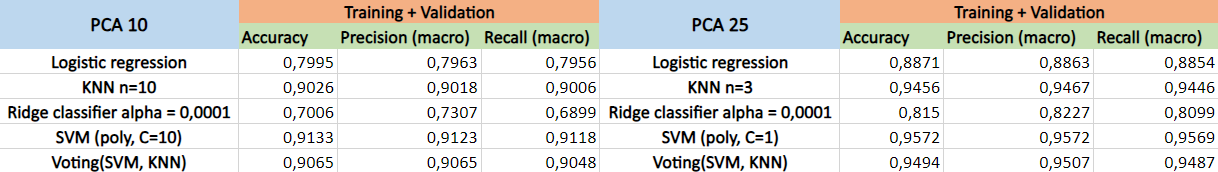

The training and validation metrics for the different models tested are presented above. First, the effect of pre-processing can be seen in the significant performance boost of all models when we increase the dimensionality of PCA. However, this increase adds a notable computational cost which is added to the already considerable overhead of the presented classifiers, especially SVM, so a balance must be found. Concretely, in the case of SVM, a more spread hyperparameter search was intended with more kernels and higher polynomial degrees, however the computational cost increased exponentially even with very small feature vectors, so the search was constrained to just linear and third-grade polynomial kernels with different values of C.

All the models were trained using cross-validation of 10 folds. Three metrics were obtained: accuracy, precision and recall. In the case of precision and recall, the "macro" type was chosen. Macro-averaging consists on calculating the mean of the binary metrics, giving equal weight to each class, which seems appropiate for this dataset where all classes are more or less equally important. Accuracy gives a metric of correct predictions over the total number of predictions. Precision gives us an intuition of the fraction of the retrieved elements that are relevant, and recall tells us the number of relevant elements that are retrieved. For this specific dataset and the trained models, the values are more or less the same for the three metrics.

From the metrics, it seems that both SVM and KNN perform significantly better than the rest, with SVM offering a slightly better performance, though with a much higher computational cost - with training and validation taking >15 minutes compared with KNN which only takes around 1 minute. Logistic regression and the ridge classifier perform clearly worse, as linear boundaries do not seem to work very well in this case with different types of calligraphy and numbers which are similarly shaped. On the other hand, KNN and SVM seem to better capture this variance.

With PCA 25, a precision over 95% was obtained for SVM with third-degree polynomial kernel and a slack parameter C=1. Coefficient C captures the tradeoff between the margin and the amount of slack, with higher values giving more importance to the deviations from the right side of the hyperplane, which is the case here.

The voting classifier offers results that sit between KNN and SVM, which makes sense as it uses a majority voting mechanism between the two models. However, the performance is still slightly worse than standalone SVM, so we stick with the latter.

# Test

Accuracy in the test set, SVM: 0.9614285714285714


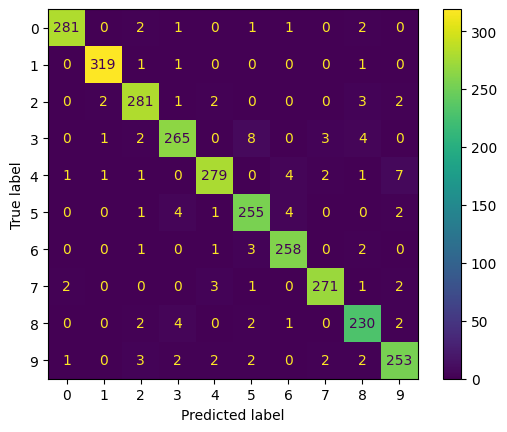

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

acc_svm_test = svm_hyp.score(x_test, y_test)
print('Accuracy in the test set, SVM: {}'.format(acc_svm_test))
ConfusionMatrixDisplay.from_estimator(svm_hyp, x_test, y_test)
plt.show()  # doctest: +SKIP

In the test stage, the best performing model during training and validation, which in this case is polynomial SVM for a dataset preprocessed with 25-dimensional PCA, is presented with the test set. The accuracy value obtained and confusion matrix are shown above. As it can be seen, we achieve an accuracy of over 95% which is quite impressive given the relative simplicity of the algorithm and the reduced dataset. In the confusion matrix, it can be seen how the classifier has trouble distinguishing between 4s and 9s and 5s and 3s, which is fair as these pairs of numbers are similarly shaped in most styles of calligraphy.